<a id="cont"></a>
## Table of Content

<a href=#one>1. Team Members</a>

<a href=#two>2. Introduction</a>    

<a href=#three>3. Import Packages</a>

<a href=#four>4. Load Data and Processing</a>
   
<a href=#five>5.  Exploratory Data Analysis (EDA)</a>

<a href=#six>6.  Building Machine Learning Models </a>

<a href=#seven>7. Conclusion</a>

<a href=#eight>8. Recommendation</a>


<a id="one"></a>
# 1. Team Members
<a href=#cont>Back to Table of Contents</a>

- Group member 1
    - Name: Precious Orekha
    - Email: poo27@drexel.edu

- Group member 2
    - Name: Nana Afua Martinson
    - Email: nsm86@drexel.edu

- Group member 3
    - Name: Nakol Bennam
    - Email: nb3286@drexel.edu

<a id="two"></a>
# 2. Introduction
<a href=#cont>Back to Table of Contents</a>

#### 2.1 Overview

### Data Source: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data

We obtained the dataset from kaggle

**DISCUSSION ON DATA SET**

Our project is focused on building a predictive model that estimates health insurance charges based on age, sex, bmi, smoker status, number of dependents and the region of the US they are located


**DATA INFO**

Our dataset consist of 7 columns

- Age: primary age of beneficary
- Sex: gender (male or female)
- BMI: body mass index
- Children: number of dependents
- Smoker: smoker/ non smoker
- Region: residential area they are located in the US (northeast, southeast, northwest, northwest)
- Charges: medical cost billed by insurance companies



**What We Hope To Achieve With Our Analysis**

- To help insurance companies make better estimates charges for individuals
- To help identify individuals who are at high risk for certain heart conditions
- To help identify factors influencing healthcare cost
- To serve as foundation for futher research and development of tools that can improve healthcare

<a id="three"></a>
# 3. Import Packages
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collection of modules in their classes and based on their functionality.

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn, plotly`
    

**SEE** in-line comments BELOW for purpose per importation.

In [ ]:
"""
For a seamless run,
All required libraries will be imported here.

"""

#importing the libraries needed
import pandas as pd
import numpy as np
import requests
from time import sleep
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score

<a id="four"></a>
# 4. Load Data and Processing
<a href=#cont>Back to Table of Contents</a>

**Source**

The data for the project is gotten from  https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# shape of the data

df.shape


(1338, 7)

In [ ]:
# descriptive statistics of numerical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# column names

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# check indexing

df.index

RangeIndex(start=0, stop=1338, step=1)

In [ ]:
# check for null values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# check for duplicated rows

duplicated = df.duplicated()
duplicated_df = df[duplicated]
duplicated_df

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# filter duplicated rows

df.loc[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#drop duplicates

df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#check subcategories of categorical columns

df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<a id="five"></a>
# 5. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

<Figure size 2000x1500 with 0 Axes>

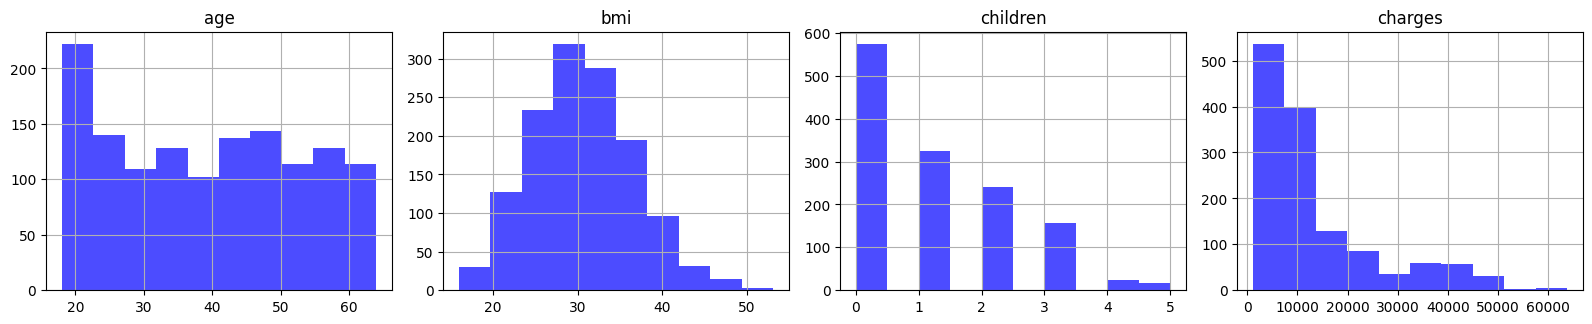

In [ ]:
#ditribution of numerical coulmns

plt.figure(figsize=(20, 15))
df.hist(column=df.columns, bins=10, figsize=(20, 15), layout=(5, 5), color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

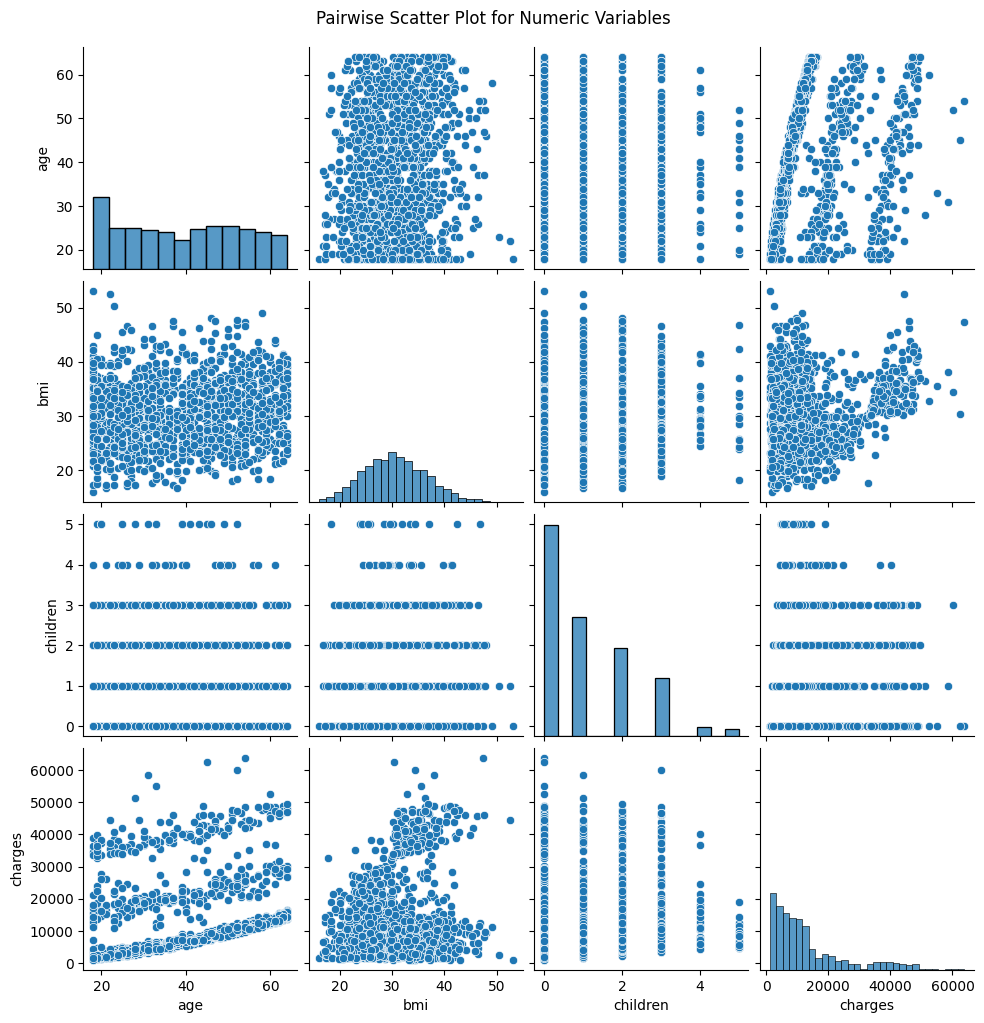

In [ ]:
#Checking relationship between numeric columns

plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot for Numeric Variables', y=1.02)
plt.show()

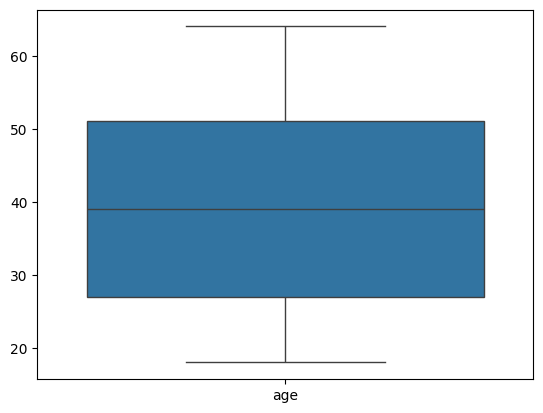

In [ ]:
# check for outliers

sns.boxplot(data=df[['age']])
plt.show()

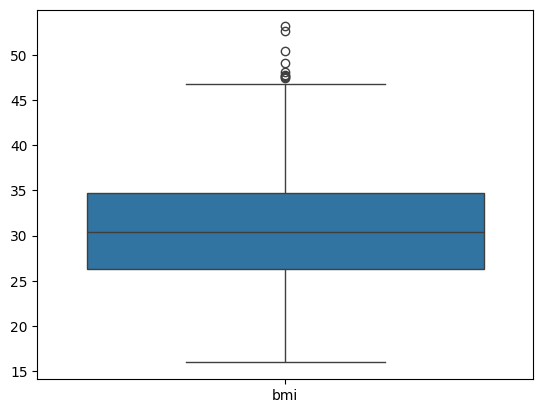

In [ ]:
sns.boxplot(data=df[['bmi']])
plt.show()

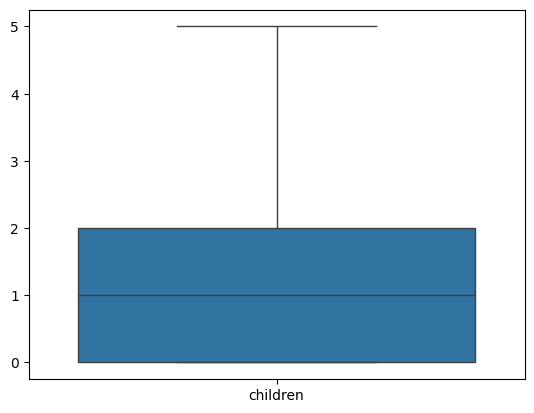

In [ ]:
sns.boxplot(data=df[['children']])
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

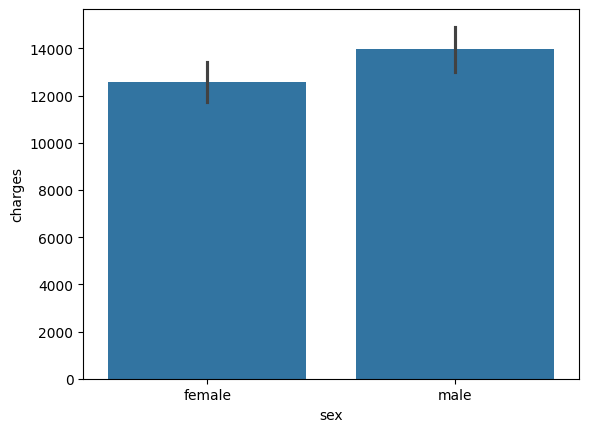

In [ ]:
sns.barplot(data = df, x = 'sex', y = 'charges')

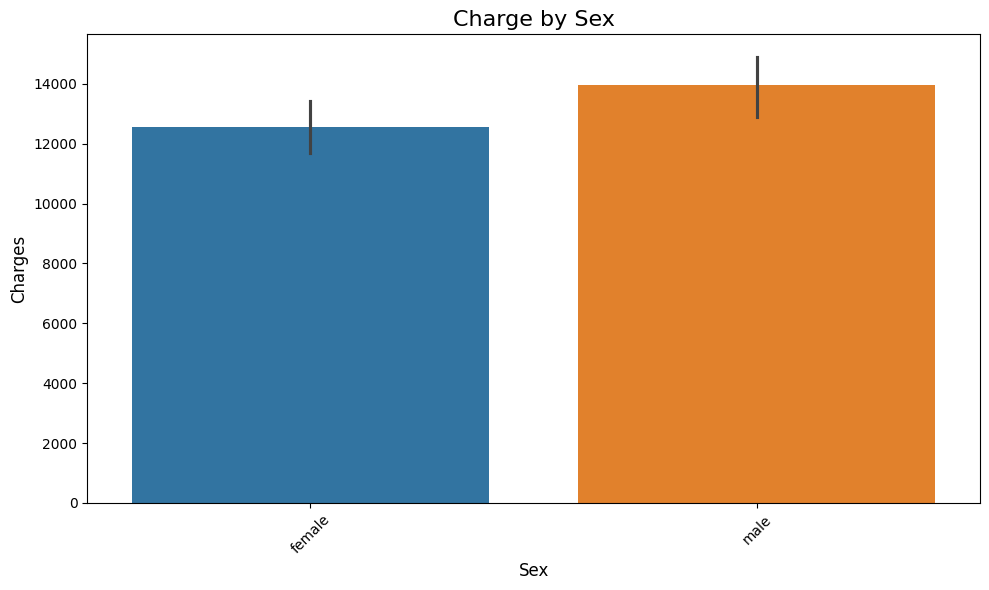

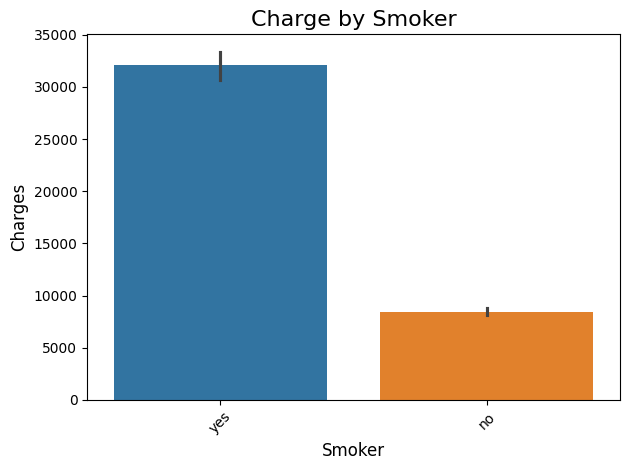

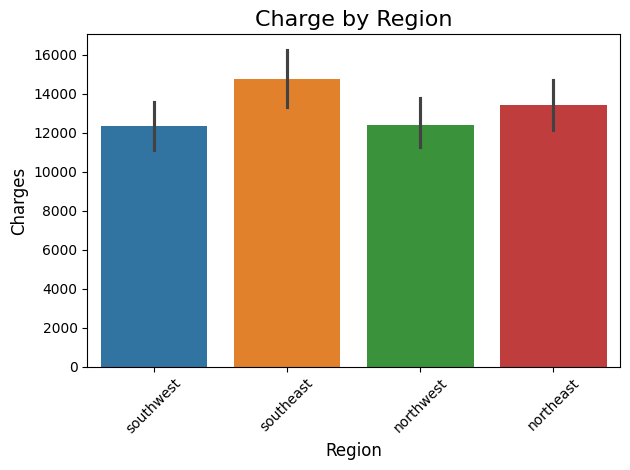

In [ ]:
## plot that plots categorical columns

plt.figure(figsize = (10, 6))

categorical_columns = [x for x in df.columns if df[x].dtype == 'object']

for column in categorical_columns:
  sns.barplot(x = column, y = 'charges', data = df , hue = column)
  plt.title(f'Charge by {column.capitalize()}', fontsize = 16)
  plt.xlabel(column.capitalize(), fontsize = 12)
  plt.ylabel('Charges', fontsize = 12)
  plt.xticks(rotation = 45)
  plt.tight_layout()
  plt.show()


In [ ]:
# Carrying out a correlation analysis to make comparison with Charges

corr_matrix = df.corr(numeric_only=True)
corr_matrix['charges'].sort_values(ascending=False)


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

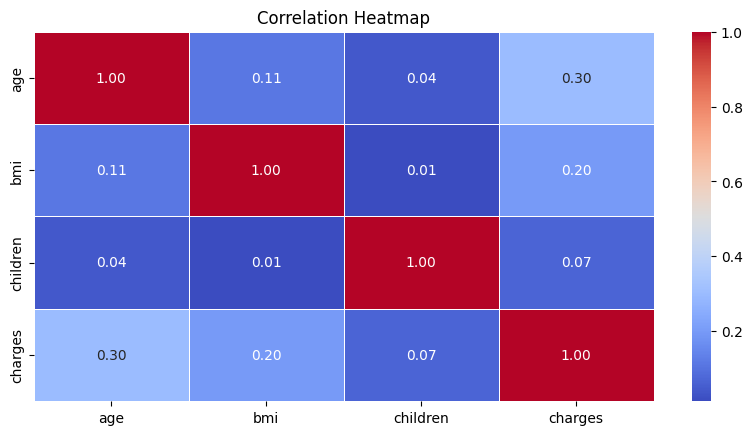

In [ ]:
# Correlation matrix

corr_matrix = df.corr(numeric_only=True)

plt.figure().set_figwidth(10,8)
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Summary From Analysis

- Age: Typically, insurance charges increase with age due to higher health risks.
- BMI: Higher BMI  correlate with higher charges due to associated health risks.
- Smoker: Smoking status is a significant factor, with smokers usually incurring higher charges.

<a id="six"></a>
# 6. Building Machine Learning Models
<a href=#cont>Back to Table of Contents</a>

In this section, we explore various models that can be used for solving Regression problems including Linear Regression, Lasso Regression, Ridge Regression, Decision Trees, Random Forest,and LightGBM.

We first started by transforming our columns by using standard scaler for our numerical columns and one hot encoding for our categorical columns. For each model, we built a pipeline which included column transformations and model object. We proceeded to split our data into train and test sets.

We employed the use of GridSearchCV to tune hyparameters and then chose the best performing model which we used in final training of our train dataset. After, we used our test data to make predictions. Based on the predictions from our models, we calculated various metrics including Mean Squared Error, Root Mean Squared Error and R^2 Score.

### Data Transformation

In [ ]:
#Set dependent and independent variables
y = df['charges']
X = df.drop(columns=['charges'])

In [ ]:
#Create Standard Scaler object
std_scaler = StandardScaler()

#Create One Hot Encoder Object
ohe = OneHotEncoder(drop='first')

#Create Column Transformer for the preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('std_scaler', std_scaler, ['age', 'bmi', 'children']),
        ('ohe', ohe, ['sex', 'smoker', 'region'])],
    remainder='passthrough')

In [ ]:
#Create train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Linear Regression**

In [ ]:
#Create Linear Regression object
lr = LinearRegression()

#Create Linear Regression pipeline
pipe = make_pipeline(preprocessor, lr)

In [ ]:
#Get cross validation scores for default linear regression model
scores = cross_val_score(pipe, X_train, y_train, scoring = "neg_mean_squared_error", cv=10)

#Calculate mean square error
mse = -scores
print(f'MSE: {mse.mean()}')

#Calculate rootmean square error
lr_cross_val_rmse = np.sqrt(-scores.mean())

print(f'RMSE: {lr_cross_val_rmse}')


MSE: 37885866.06183882
RMSE: 6155.149556415247


In [ ]:
#Train entire test data
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [ ]:
#Get Linear Regression predictions
linear_predictions = pipe.predict(X_test)

In [ ]:
#Calculate mean square error
mse =mean_squared_error(y_test, linear_predictions)
print(f'MSE: {mse}')

#Calculate root mean square error  and Rsquared Error
lr_rmse = np.sqrt(mse)
print(f'RMSE: {lr_rmse}')
print(f'R² Score: {r2_score(y_test, linear_predictions)}')

MSE: 33596915.85136148
RMSE: 5796.284659276275
R² Score: 0.7835929767120722


**Lasso Regression**

In [ ]:
#Create Lasso Regression object
l1 = Lasso()

In [ ]:
#Create Lasso Regression Pipeline
l1_pipe = make_pipeline(preprocessor, l1)

#Create parameter grid
param_grid = {'lasso__alpha': [0.1, 1, 10, 100, 1000]}

#Create a GridSearchCV instance
l1_grid = GridSearchCV(l1_pipe, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search to the data
l1_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std_scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters
l1_best_params = l1_grid.best_params_
l1_best_params

{'lasso__alpha': 100}

In [ ]:
# Train the final model with the best parameters
l1_grid.best_estimator = l1_grid.best_estimator_.fit(X_train,y_train)

In [ ]:
#Get Ridge Regression predictions
l1_best_predictions =l1_grid.best_estimator.predict(X_test)

In [ ]:
#Calculate mean square error
l1_mse = mean_squared_error(y_test, l1_best_predictions)
print(f'MSE: {l1_mse}')


#Calculate root mean square error  and Rsquared Error
l1_rmse = np.sqrt(l1_mse)
print(f'RMSE: {l1_rmse}')
print(f'R²: {r2_score(y_test, l1_best_predictions)}')

MSE: 34266062.50186862
RMSE: 5853.722106648779
R²: 0.7792828181421608


**Ridge Regression**

In [ ]:
#Create Ridge Regression object
l2 = Ridge()

In [ ]:
#Create Ridge Regression Pipeline
l2_pipe = make_pipeline(preprocessor, l2)

#Create parameter grid
param_grid = {'ridge__alpha': [0.1, 1, 10, 100, 1000]}

#Create a GridSearchCV instance
l2_grid = GridSearchCV(l2_pipe, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search to the data
l2_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std_scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters
l2_best_params = l2_grid.best_params_
l2_best_params

{'ridge__alpha': 1}

In [ ]:
# Train the final model with the best parameters
l2_best_estimator = l2_grid.best_estimator_.fit(X_train,y_train)

In [ ]:
#Get Ridge Regression predictions
l2_best_predictions =l2_best_estimator.predict(X_test)

In [ ]:
#Calculate mean square error
l2_mse = mean_squared_error(y_test, l2_best_predictions)
print(l2_mse)

#Calculate root mean square error  and Rsquared Error
l2_best_rmse = np.sqrt(l2_mse)
print(f'RMSE: {l2_best_rmse}')
print(f'R²: {r2_score(y_test, l2_best_predictions)}')

33645393.49385556
RMSE: 5800.464937731764
R²: 0.7832807188145148


**Decision Tree**

Without Parameter Tuning

In [ ]:
Dec_Tree = DecisionTreeRegressor(random_state = 42)

Tree_pipe = make_pipeline(preprocessor, Dec_Tree)

Tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
Dec_pred = Tree_pipe.predict(X_test)

In [ ]:
#Calculate mean square error
Dec_mse = mean_squared_error(y_test, Dec_pred)
print(f'MSE: {Dec_mse}')

#Calculate root mean square error  and Rsquared Error
Dec_rmse = np.sqrt(Dec_mse)

print(f'RMSE: {Dec_rmse}')
print(f'R²: {r2_score(y_test, Dec_pred)}')

MSE: 40795333.45408598
RMSE: 6387.122470572017
R²: 0.7372259788399772


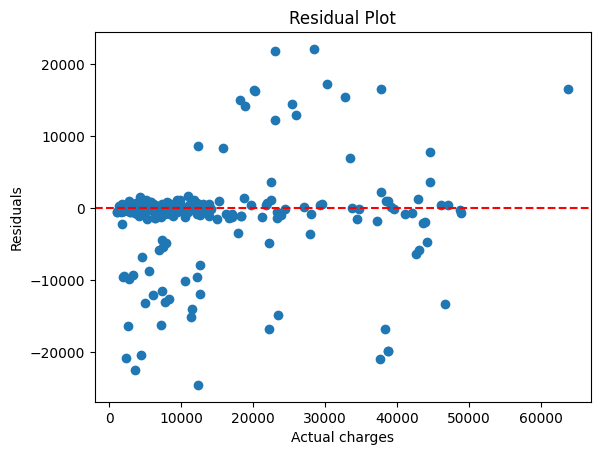

In [ ]:
#Residual plot
plt.scatter(y_test, y_test - Dec_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



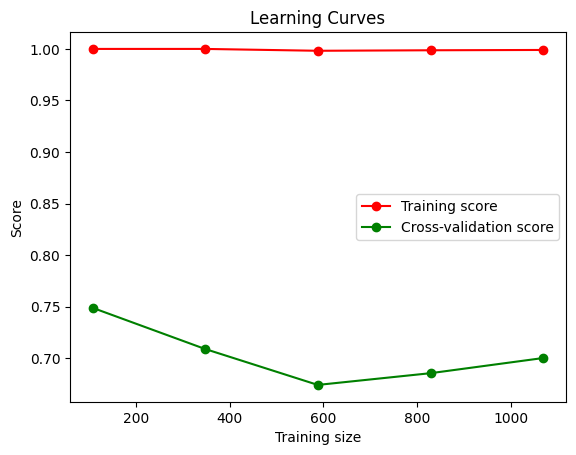

In [ ]:
# Learning curves

train_sizes, train_scores, test_scores = learning_curve(Tree_pipe, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show()

The decision Tree model performs well on Training set but poorly on new Test set. This is a sign of overfitting which is very perculiar to Decision Tree models

In [ ]:
## Using Hyperparameter Tuning

# Create a pipeline with preprocessor and a decision tree regressor
Tree_pipe = make_pipeline(preprocessor, Dec_Tree)

# Define the parameter grid
param_grid = {
    'decisiontreeregressor__max_depth': [None, 10, 20, 30, 40],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
    'decisiontreeregressor__max_features': [None, 'sqrt', 'log2']
}


# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=Tree_pipe,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Best model
best_model = grid_search.best_estimator_

Best parameters found:  {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_features': None, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}


In [ ]:
tree_tuned = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

tree_tuned = make_pipeline(preprocessor, tree_tuned)

tree_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=10,
                                       random_state=42))])

In [ ]:
Tree_pred = tree_tuned.predict(X_test)

In [ ]:
#Calculate mean square error
tree_mse = mean_squared_error(y_test, Tree_pred)
print(f'MSE: {tree_mse}')

#Calculate root mean square error  and Rsquared Error
Tree_rmse = np.sqrt(tree_mse)

print(f'RMSE: {Tree_rmse}')
print(f'R²: {r2_score(y_test, Tree_pred)}')

MSE: 26769489.54386002
RMSE: 5173.923998655181
R²: 0.8275703170864329


**Random Forest**

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
forest_pipe = make_pipeline(preprocessor, rf_regressor)

forest_pipe.fit(X_train, y_train)

# Making predictions on the test set
y_pred_forest = forest_pipe.predict(X_test)


# Evaluating the model
mse = mean_squared_error(y_test, y_pred_forest)
print("Mean Squared Error:", mse)

Mean Squared Error: 20864569.513376206


In [ ]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest))}')
print(f'R² Score: {r2_score(y_test, y_pred_forest)}')

RMSE: 4567.775116331386
R² Score: 0.8656055394920775


The Random Forest Model Performs Better than the Decision Tree Model, even better than the Tuned Decision Tree model

In [ ]:
#Tuning Parameters for Random Forest

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Training the model
forest_pipe = make_pipeline(preprocessor, rf_regressor)

# Define the parameter grid
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 150],
    'randomforestregressor__max_depth': [None, 10, 20],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__max_features': ['auto', 'sqrt']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=forest_pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_forest2 = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_forest2)
print("Mean Squared Error:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 150}
Mean Squared Error: 19123152.12661882


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor_tuned = RandomForestRegressor(random_state=42, n_estimators = 150,
                                           max_depth = 10, max_features = 'auto',
                                           min_samples_leaf = 4, min_samples_split =  10)


rf_regressor_tuned = make_pipeline(preprocessor, rf_regressor_tuned)

# Training the model
rf_regressor_tuned.fit(X_train, y_train)

# Making predictions on the test set
y_pred_forest2 = rf_regressor_tuned.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_forest2)
print("Mean Squared Error:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error: 19123152.12661882


In [ ]:
#Calculate mean square error
forest_mse = mean_squared_error(y_test, y_pred_forest2)
print(f'MSE: {forest_mse}')

#Calculate root mean square error  and Rsquared Error
forest_rmse = np.sqrt(forest_mse)

print(f'RMSE: {forest_rmse}')
print(f'R²: {r2_score(y_test, y_pred_forest2)}')

MSE: 19123152.12661882
RMSE: 4373.002644250152
R²: 0.8768224903168877


In [ ]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_forest2))}')
print(f'R² Score: {r2_score(y_test, y_pred_forest2)}')

RMSE: 4373.002644250152
R² Score: 0.8768224903168877


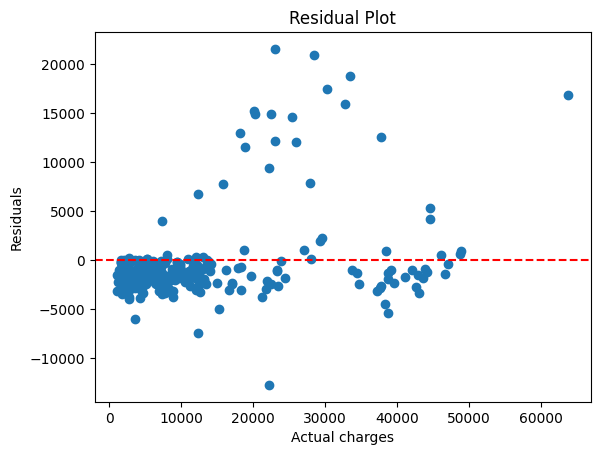

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

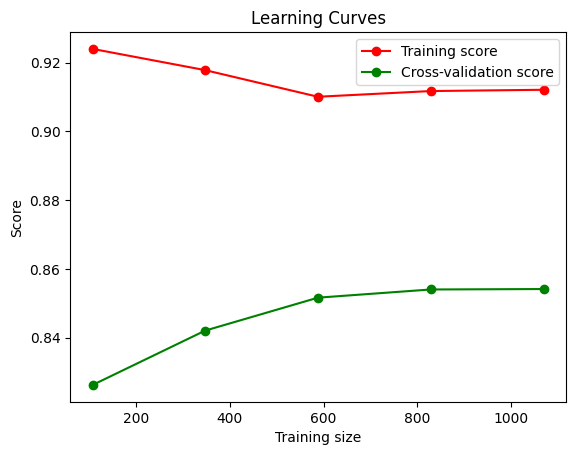

In [ ]:
## Testing Learning Curve for Random Forest

#Residual plot
plt.scatter(y_test, y_test - y_pred_forest2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_regressor_tuned, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show()

This model looks better than the Decision Tree Model as it has lower RMSE and higher R-Squared score. It is also evident that the validation and training scores are not so far part which means overfitting.

**XGBOOST**

In [ ]:
## XGBOOST
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_pipe = make_pipeline(preprocessor, xgb_regressor)

# Train the model
xgb_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_pipe.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Mean Squared Error:", mse_xgb)

XGBoost Mean Squared Error: 23434704.61742758


In [ ]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}')
print(f'R² Score: {r2_score(y_test, y_pred_xgb)}')

RMSE: 4840.9404682796485
R² Score: 0.8490505887407566


In [ ]:
##XGBOOST Parameter Tuning

# Define the parameter grid
param_grid = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.3],
    'xgbregressor__gamma': [0, 0.1, 0.2],
    'xgbregressor__subsample': [0.8, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set using the best model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)


Best Parameters (XGBoost): {'xgbregressor__colsample_bytree': 1.0, 'xgbregressor__gamma': 0, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 0.8}


In [ ]:
# Evaluate the model
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
print("XGBoost Mean Squared Error (Tuned):", mse_xgb_tuned)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))}')
print(f'R² Score: {r2_score(y_test, y_pred_xgb_tuned)}')

XGBoost Mean Squared Error (Tuned): 18997304.072794992
RMSE: 4358.589688511066
R² Score: 0.877633112423842


**LightGBM**

In [ ]:
## LIGHTGBM

# Define the LightGBM regressor
lgb_regressor = lgb.LGBMRegressor(random_state=42)

lgb_pipe = make_pipeline(preprocessor, lgb_regressor)

# Train the model
lgb_pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_pipe.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733


In [ ]:
# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print("LightGBM Mean Squared Error:", mse_lgb)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgb))}')
print(f'R² Score: {r2_score(y_test, y_pred_lgb)}')


LightGBM Mean Squared Error: 20815018.319002103
RMSE: 4562.347895437403
R² Score: 0.8659247124340912


In [ ]:
## LightGBM Parameter Tuning

# Define the parameter grid
param_grid = {
    'lgbmregressor__n_estimators': [100, 200, 300],
    'lgbmregressor__max_depth': [3, 5, 7],
    'lgbmregressor__learning_rate': [0.01, 0.1, 0.3],
    'lgbmregressor__subsample': [0.8, 0.9, 1.0],
    'lgbmregressor__colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search_lgb.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters (LightGBM):", grid_search_lgb.best_params_)

# Get the best model
best_lgb_model = grid_search_lgb.best_estimator_

# Make predictions on the test set using the best model
y_pred_lgb_tuned = best_lgb_model.predict(X_test)

In [ ]:
# Evaluate the model
mse_lgb_tuned = mean_squared_error(y_test, y_pred_lgb_tuned)
print("LightGBM Mean Squared Error (Tuned):", mse_lgb_tuned)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgb_tuned))}')
print(f'R² Score: {r2_score(y_test, y_pred_lgb_tuned)}')

### Combining All Models Together

In [ ]:
# List of models and their predictions
models = {
    'Linear Regression': linear_predictions,
    'Lasso': l1_best_predictions,
    'Ridge': l2_best_predictions,
    'Decision Tree': Tree_pred,
    'Random Forest': y_pred_forest2,
    'XGBoost': y_pred_xgb_tuned,
    'LightGBM': y_pred_lgb_tuned
}

# Initialize lists to store evaluation metrics
mse_scores = []
rmse_scores = []
r_squared_scores = []

# Calculate evaluation metrics for each model
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_scores.append(rmse)

    r_squared = r2_score(y_test, y_pred)
    r_squared_scores.append(r_squared)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models.keys(),
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R-squared': r_squared_scores
})

# Display the DataFrame
results_df.sort_values(by = 'R-squared', ascending = False)

In [ ]:
# Create subplots for each evaluation metric
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE
axes[0].bar(results_df['Model'], results_df['MSE'], color='skyblue')
axes[0].set_ylabel('MSE')
axes[0].set_title('Mean Squared Error for Different Models')

# Plot RMSE
axes[1].bar(results_df['Model'], results_df['RMSE'], color='orange')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Root Mean Squared Error for Different Models')

# Plot R-squared
axes[2].bar(results_df['Model'], results_df['R-squared'], color='green')
axes[2].set_ylabel('R-squared')
axes[2].set_title('R-squared for Different Models')

# Rotating x-axis labels
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [73]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

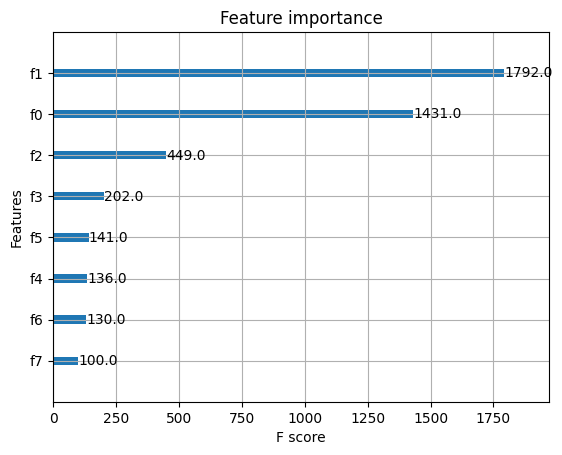

In [74]:
# Plot feature importance
xgb.plot_importance(xgb_regressor)
plt.show()

<a id="seven"></a>
# 7. Conclusion

<a href=#cont>Back to Table of Contents</a>

From the models built, the ensemble models i.e Random Forest, XGBoost, LightGBM performed better than individual models i.e Linear Regression, Lasso Regression, Ridge Regression and Decision Tree models. This conclusion was made by comparing the root mean squared errors and r squared scores of each model.


The root mean squared error gives an idication of difference between the actual and predicted charges. The lower the RMSE the better the model performance as this is an indication of how well the model was able to learn the data(how well the model fit the data). The RMSE is calculated as the square root of the sum of the differences between each actual charge and the the predicted charge. By squaring the differences, we are able to penalize higher error margins which help us to get a better understanding of the model performance and also makes it ideal to compare different performaces.


The r^2 score indicates how well the regression predictions approximate the real data points. 𝑅^2
=
1
R
2
 =1 means the model perfectly predicts the data points.
𝑅^2
=
0
R
2
 =0 menas the model does not explain any of the variability in the data.
𝑅^
2
<
0
R
2
 <0: means the model is worse than a horizontal line (mean of the actual values), indicating that the model is not useful.


With this knowledge in mind, we determined the best performing model by observing those models that had lower rmse with r^2 scores closer to 1. Therefore, XGBoost performed the best.


<a id="eight"></a>
# 8. Recommendations
<a href=#cont>Back to Table of Contents</a>





- Increase the size of the dataset and enhance feature set
- Research the impact of economic factors, health insurance policies and regional differences on health insurance charges
- Deployment: develop a plan for deploying the model in a real-world setting
